In [1]:
import sys,os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle # 데이터용량을 작게 저장시키게 해주는 라이브러리
from dataset.mnist import load_mnist
from common.functions import sigmoid,softmax

In [20]:
def get_data():
    (x_train,t_train), (x_test,t_test) = load_mnist(normalize=True, flatten=True)
    return x_test, t_test
def init_network():
    with open("C:/developcoding/bottomdeeplearning/lecture5/sample_weight.pkl",'rb') as f:
        network = pickle.load(f)
    return network
def predict(network,x):
    W1, W2, W3 = network['W1'],network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y= softmax(a3)

    return y

x, t = get_data() 
network = init_network()
# accuracy_cnt = 0
# for i in range(len(x)):
#     y = predict(network,x[i])
#     p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다
#     if p == t[i]:
#         accuracy_cnt+=1
# print('Accuracy'+ str(float(accuracy_cnt)/len(x)))

# 조건 이미 훈련된 머신러닝을 불러와서 한 작업. 그렇기에 init_network에서 이미 학습된것을 불러 온다.
# sample_weight는 딕셔너리 형태로 저장되어있다  

In [3]:
# argmax
x=np.array([1,3,2]) 

np.argmax(x) # 최대값이 나오는 지점이 나온다.그래서 x[1]이라 1이 나온다.
 

1

In [28]:
import sys,os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
np.set_printoptions(linewidth=1000,threshold=100000)

with open("C:/developcoding/bottomdeeplearning/lecture5/sample_weight.pkl",'rb') as f:
    network = pickle.load(f)

W1, W2, W3 = network['W1'], network['W2'],network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']

# print(W1)

print(type(network))
print(network.keys())
print('W1 shape'+str(W1.shape))
print('W2 shape'+str(W2.shape))
print('W3 shape'+str(W3.shape))
print('b1 shape'+str(b1.shape))
print('b2 shape'+str(b2.shape))
print('b3 shape'+str(b3.shape))

<class 'dict'>
dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])
W1 shape(784, 50)
W2 shape(50, 100)
W3 shape(100, 10)
b1 shape(50,)
b2 shape(100,)
b3 shape(10,)


In [18]:
import sys,os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid,softmax
import time 
start = time.time()
def get_data():
    (x_train,t_train), (x_test,t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test
def init_network():
    with open("C:/developcoding/bottomdeeplearning/lecture5/sample_weight.pkl",'rb') as f:
        network = pickle.load(f)
    return network
def predict(network,x):
    W1, W2, W3 = network['W1'],network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y= softmax(a3)

    return y
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size]# [0:100] -> 0~99 
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt+= np.sum(p == t[i:i+batch_size])
    
print('Accuracy'+str(float(accuracy_cnt)/len(x)))
print(time.time()-start)
#batch_size 를 넣으면 속도가 빨라진다. 한장씩 넣기보다 여려개를 넣는다 ->병목현상을 없애준다!

Accuracy0.9352
0.12061929702758789


[8, 33, 66, 92, 124, 149, 217, 233, 241, 245, 247, 259, 290, 300, 313, 320, 321, 340, 341, 352, 358, 362, 381, 445, 448, 449, 478, 479, 495, 502, 507, 511, 531, 543, 551, 565, 569, 578, 582, 591, 610, 619, 627, 629, 659, 684, 691, 707, 717, 720, 740, 791, 810, 839, 844, 857, 881, 882, 898, 924, 938, 939, 947, 950, 956, 965, 982, 999, 1014, 1032, 1039, 1044, 1050, 1062, 1068, 1082, 1107, 1112, 1114, 1119, 1124, 1181, 1191, 1192, 1194, 1198, 1204, 1206, 1224, 1226, 1232, 1242, 1247, 1251, 1256, 1260, 1283, 1289, 1299, 1319, 1325, 1326, 1328, 1337, 1364, 1378, 1393, 1410, 1413, 1429, 1433, 1440, 1444, 1465, 1466, 1467, 1494, 1500, 1522, 1525, 1527, 1530, 1549, 1553, 1559, 1569, 1581, 1601, 1609, 1621, 1634, 1640, 1671, 1678, 1681, 1696, 1709, 1717, 1722, 1732, 1737, 1751, 1754, 1759, 1765, 1772, 1773, 1782, 1790, 1800, 1813, 1828, 1850, 1857, 1865, 1878, 1880, 1901, 1913, 1917, 1930, 1938, 1952, 1955, 1956, 1970, 1973, 1981, 1984, 2016, 2024, 2035, 2040, 2043, 2044, 2053, 2068, 2070, 2098

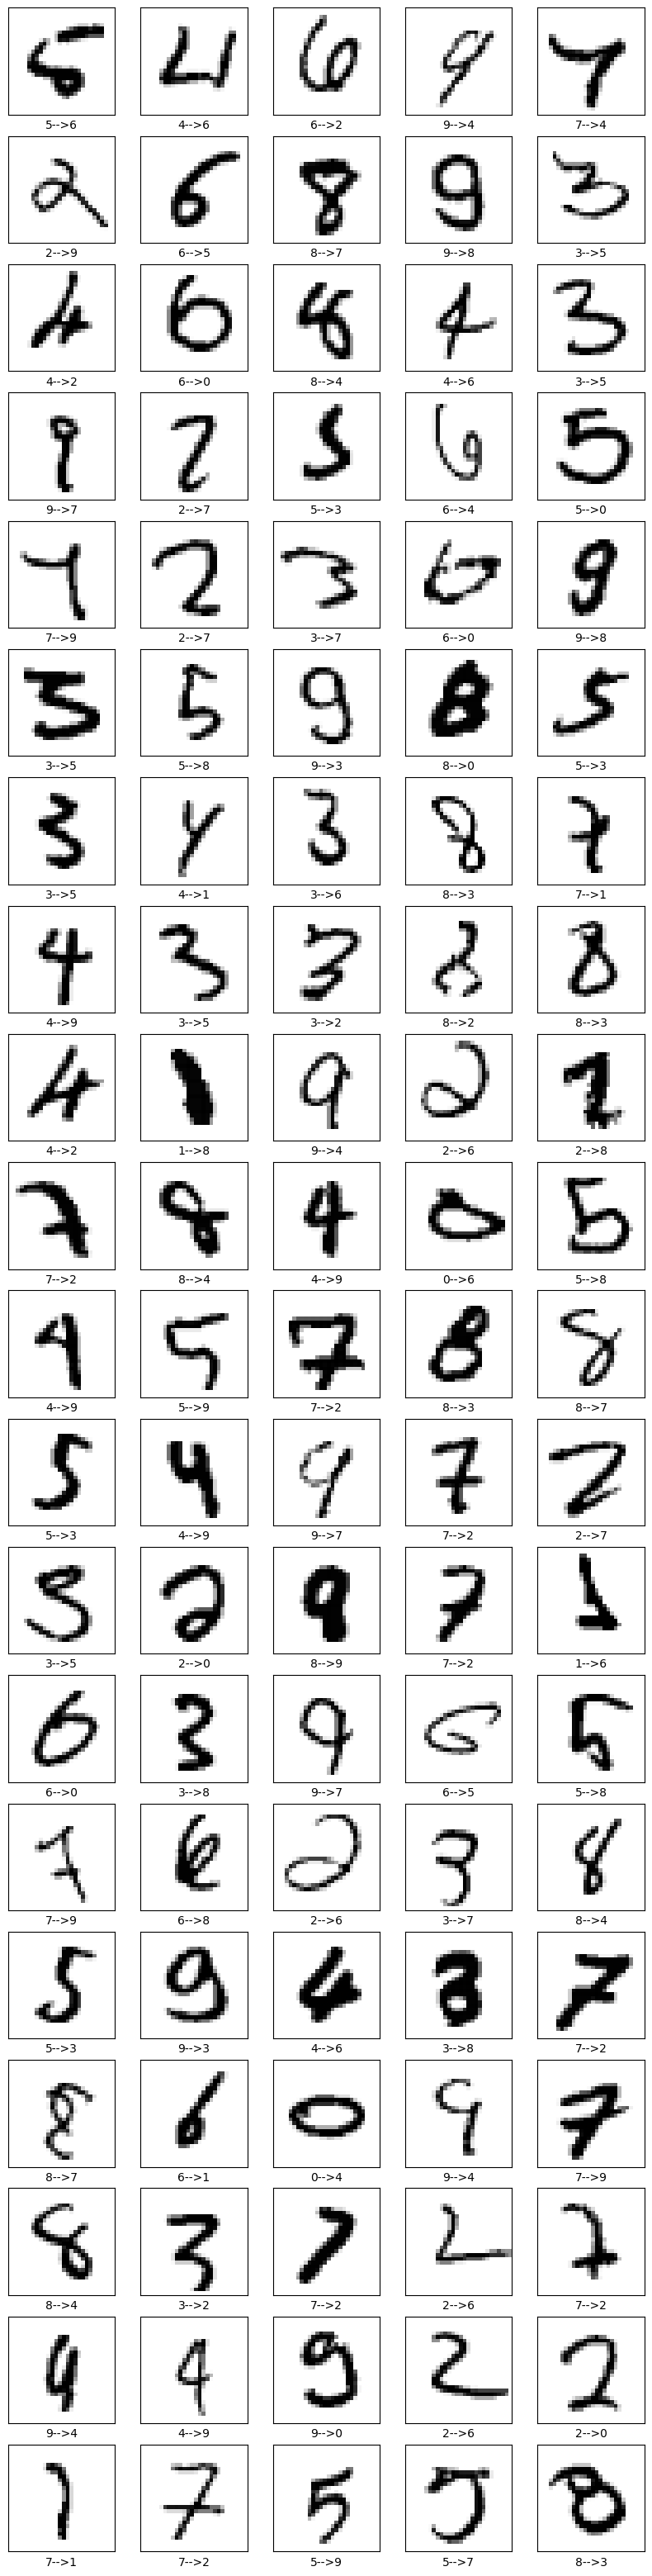

In [10]:
import matplotlib.pyplot as plt


def get_data():
    (x_train,t_train), (x_test,t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test
def init_network():
    with open("C:/developcoding/bottomdeeplearning/lecture5/sample_weight.pkl",'rb') as f:
        network = pickle.load(f)
    return network
def predict(network,x):
    W1, W2, W3 = network['W1'],network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y= softmax(a3)

    return y

x, t = get_data()
network = init_network()
error = []
P=[]
for i in range(len(x)):
    y = predict(network,x[i])
    p = np.argmax(y)
    if p != t[i]:
        error.append(i)
        P.append(p)
print(error)

plt.figure(figsize=(10,40))
for i in range(100):
    plt.subplot(20,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[error[i]].reshape(28,28),cmap=plt.cm.binary)
    plt.xlabel(str(t[error[i]])+'-->'+str(P[i]))
plt.show()

In [22]:
# 9번문제 풀이
accuracy_cnt=0
for i in range(len(x)):
    y = predict(network,x[i])
    p = np.argmax(y)
    if (p == t[i])& (y[p]>0.8): # 최대확률이 0.8이상인것만 고른다.
        accuracy_cnt+=1
print('Accuracy'+str(float(accuracy_cnt)/len(x)))

Accuracy0.8363


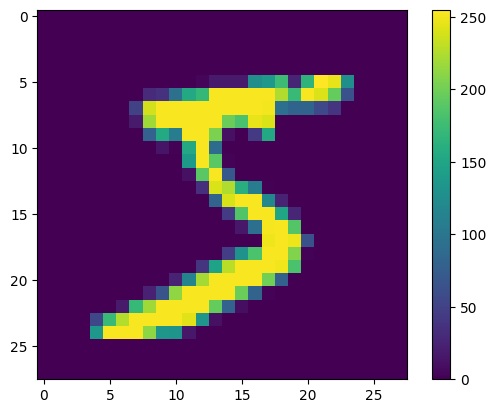

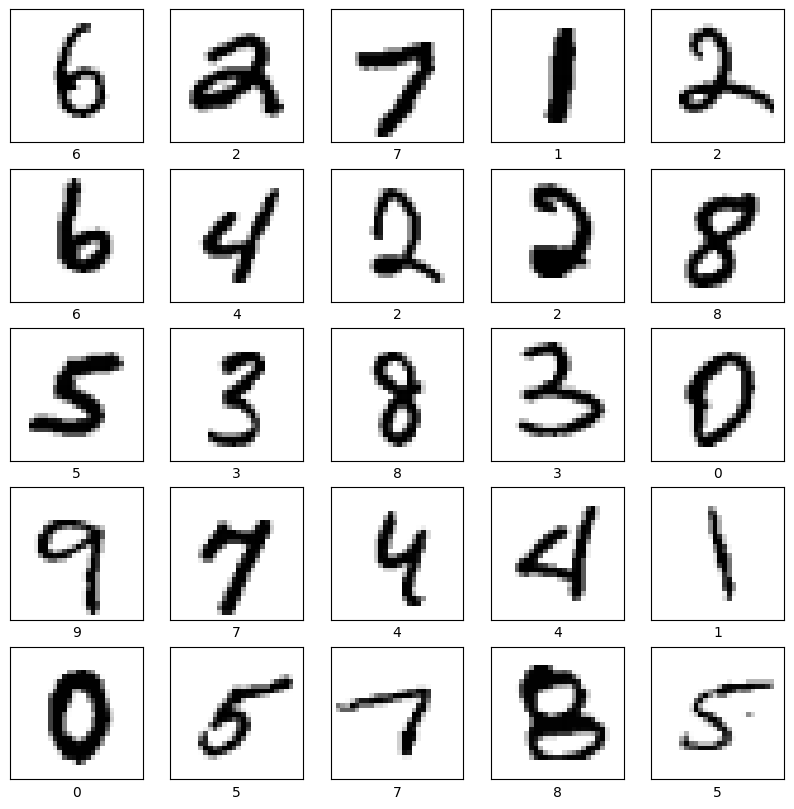

In [24]:
# 7번문제 풀이

(x_train, t_train), (x_test,t_test) = load_mnist(flatten=False, normalize=False)

plt.figure()
plt.imshow(x_train[0][0])
plt.colorbar()
plt.show()

I = np.random.choice(60000,25) # 6만개에서 25개 뽑기
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[I[i]][0],cmap=plt.cm.binary)
    plt.xlabel(t_train[I[i]])
plt.show()

In [27]:
  import sys,os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid,softmax
import time 
start = time.time()
def get_data():
    (x_train,t_train), (x_test,t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test
def init_network():
    with open("C:/developcoding/bottomdeeplearning/lecture5/sample_weight.pkl",'rb') as f:
        network = pickle.load(f)
    return network
def predict(network,x):
    W1, W2, W3 = network['W1'],network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y= softmax(a3)

    return y
x, t = get_data()
network = init_network()
confusion = np.zeros((10,10) , dtype =int)
for k in range(len(x)):
    i =int(t[k])
    y = predict(network, x[k])
    j = np.argmax(y)
    confusion[i][j]+=1
print(confusion)

[[ 962    0    3    2    1    3    5    1    3    0]
 [   0 1109    2    2    0    2    5    2   13    0]
 [  13    2  952    7    7    1   15   13   19    3]
 [   1    1   24  937    0   20    1   11   11    4]
 [   1    2    6    0  921    0   12    2    3   35]
 [  10    1    4   34    5  793   14    5   18    8]
 [  16    3    5    1   10    9  910    1    3    0]
 [   4    8   24    5    6    0    0  958    1   22]
 [   5    4    6   19   10   13   14   11  888    4]
 [  12    6    1    9   31    7    1   16    4  922]]
